# Food Delivery Time Prediction

Importing Modules

In [291]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression


# Exploratory Data Analysis

Reading Excel File

In [292]:
data=pd.read_excel('/home/vamsi/Food Delivery Time Prediction Case Study.xlsx')
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


Data Information

In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


Data Columns

In [294]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')

Description of Data

In [295]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


No.of columns and rows using data.shape

In [296]:
data.shape

(45593, 11)

First five rows using data.head()

In [297]:

data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


Last five rows using data.tail()

In [298]:
data.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26
45592,5FB2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,Snack,scooter,36


Checking how many null values are there in each column using isnull().sum()

In [299]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

Knowing Each column Data Type using dtypes

In [300]:
data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
dtype: object

In [301]:
data['Type_of_order']=data['Type_of_order'].astype(str,errors='ignore')


In [302]:
data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
dtype: object

To know how many unique values in each row


In [303]:
data.nunique()

ID                             45355
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Type_of_order                      4
Type_of_vehicle                    4
Time_taken(min)                   45
dtype: int64

Correlation

In [304]:
numeric_df = data.select_dtypes(include=['int64','float'])
correlation=numeric_df.corr()
correlation

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
Delivery_person_Age,1.000000,-0.067449,-0.001955,-0.006796,0.002359,-0.000593,0.292708
Delivery_person_Ratings,-0.067449,1.000000,-0.004846,-0.011147,-0.010198,-0.013350,-0.331103
Restaurant_latitude,-0.001955,-0.004846,1.000000,0.661784,0.866378,0.602713,0.013981
Restaurant_longitude,-0.006796,-0.011147,0.661784,1.000000,0.632293,0.915026,0.007821
Delivery_location_latitude,0.002359,-0.010198,0.866378,0.632293,1.000000,0.690515,0.014243
Delivery_location_longitude,-0.000593,-0.013350,0.602713,0.915026,0.690515,1.000000,0.007625
Time_taken(min),0.292708,-0.331103,0.013981,0.007821,0.014243,0.007625,1.000000


Adding Distance Column

In [305]:
from geopy.distance import geodesic

for i in range(45593):
    restaurant = (data.at[i, "Restaurant_latitude"], data.at[i, "Restaurant_longitude"])
    delivery = (data.at[i, "Delivery_location_latitude"], data.at[i, "Delivery_location_longitude"])
    distance = geodesic(restaurant, delivery).m
    data.at[i, "distance"] = distance


Adding Speed Column

In [306]:
data['speed'] = data['distance'] / data['Time_taken(min)']

Data Binning

In [307]:
bins = [0, 20, 30, 40, 50, 60, 100]  # Define the age ranges for bins
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-100']
data['Age_Bins'] = pd.cut(data['Delivery_person_Age'], bins=bins, labels=labels)
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance,speed,Age_Bins
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3020.736643,125.864027,31-40
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20143.736910,610.416270,31-40
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1549.692932,59.603574,21-30
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7774.496620,370.214125,31-40
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6197.897917,206.596597,31-40


In [308]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance,speed,Age_Bins
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3020.736643,125.864027,31-40
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20143.736910,610.416270,31-40
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1549.692932,59.603574,21-30
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7774.496620,370.214125,31-40
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6197.897917,206.596597,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32,1488.111648,46.503489,21-30
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36,10983.241696,305.090047,21-30
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16,4648.024233,290.501515,21-30
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26,6219.667685,239.217988,0-20


Finding differences in latitudes and longitudes

In [309]:
data['lat_diff']=data['Delivery_location_latitude']-data['Restaurant_latitude']
data['lon_diff']=data['Delivery_location_longitude']-data['Restaurant_longitude']
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance,speed,Age_Bins,lat_diff,lon_diff
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3020.736643,125.864027,31-40,0.02,0.02
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20143.736910,610.416270,31-40,0.13,0.13
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1549.692932,59.603574,21-30,0.01,0.01
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7774.496620,370.214125,31-40,0.05,0.05
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6197.897917,206.596597,31-40,0.04,0.04


# Data Visualization

Heat Map

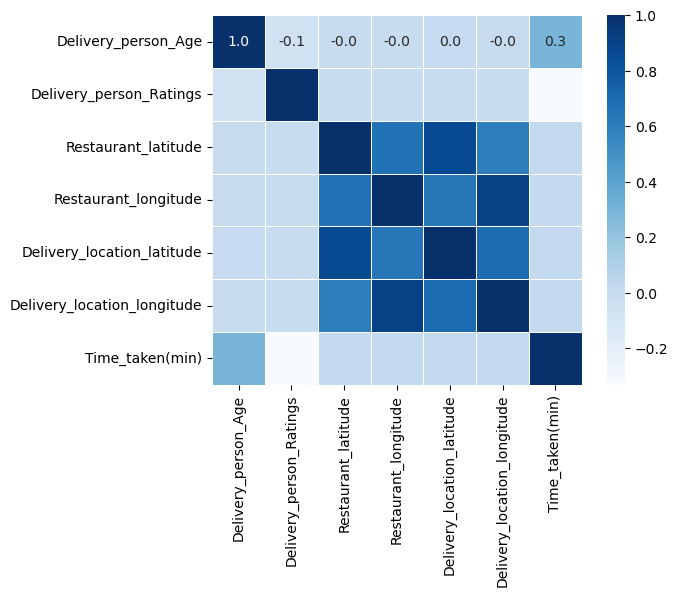

<Figure size 640x480 with 0 Axes>

In [310]:
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 10}, cmap='Blues', linewidths=0.5)
plt.show()
plt.savefig("heatmap")

Pair Plots between 'Delivery_person_Age' & 'Time_taken(min)'

/home/vamsi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vamsi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


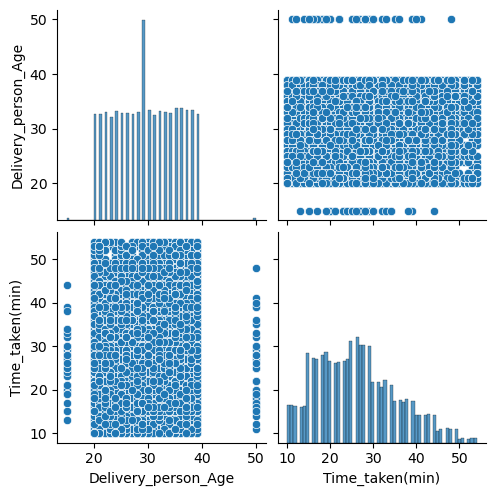

In [311]:
pair_plot_graph=data[['Delivery_person_Age', 'Time_taken(min)']]
sns.pairplot(pair_plot_graph)

In [312]:
data['Delivery_person_Age'].unique()

array([37, 34, 23, 38, 32, 22, 33, 35, 36, 21, 24, 29, 25, 31, 27, 26, 20,
       28, 39, 30, 15, 50])

In [313]:
cross_tab=pd.crosstab(data['Delivery_person_Age'],data['Time_taken(min)'])

Histogram of Age Bins

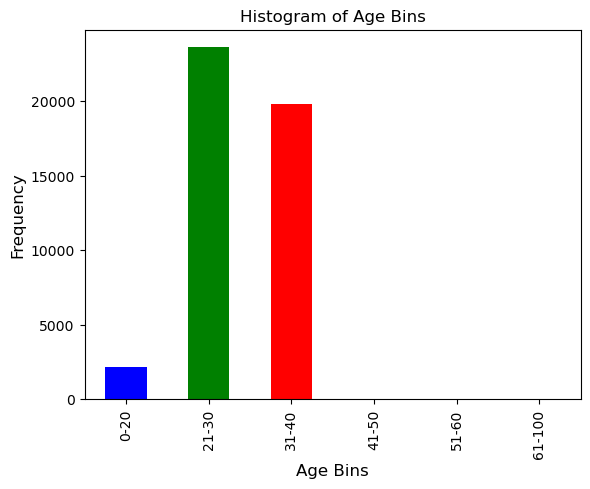

In [314]:
sorted_data = data['Age_Bins'].value_counts().sort_index()
color_palette = ['blue', 'green', 'red', 'purple']
sorted_data.plot(kind='bar',color=color_palette)
plt.xlabel('Age Bins',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram of Age Bins')
plt.show()

Histogram of Type_of_order

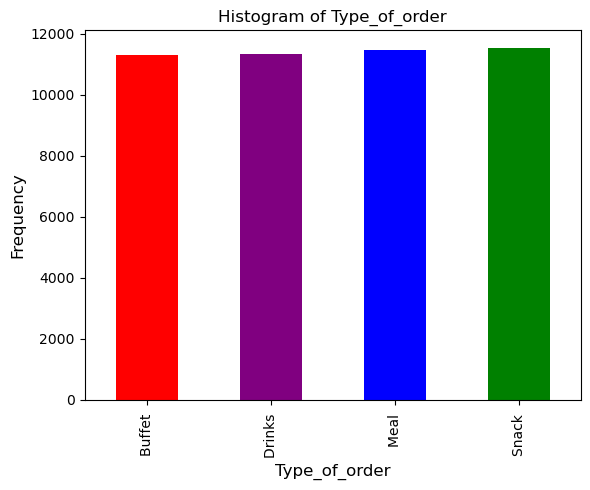

In [315]:
sorted_data = data['Type_of_order'].value_counts().sort_index()
color_palette = ['red', 'purple','blue', 'green']
sorted_data.plot(kind='bar',color=color_palette)
plt.xlabel('Type_of_order',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram of Type_of_order')

plt.show()

Scatter plot between Latitude_diff & Time_Taken_To_Delivery

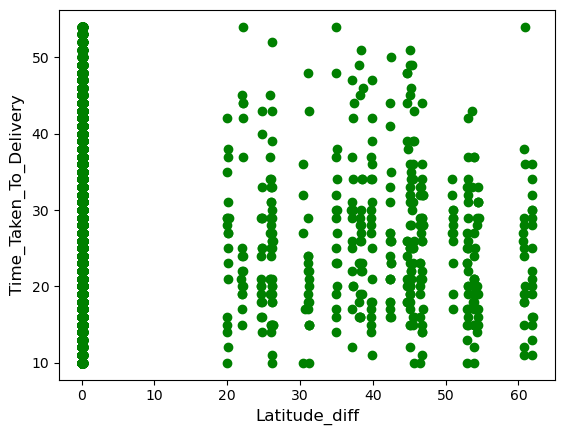

In [316]:
sorted_data=data.sort_values(by='Age_Bins')
plt.scatter(sorted_data['lat_diff'],sorted_data['Time_taken(min)'],color='green')
plt.xlabel('Latitude_diff',fontsize=12)
plt.ylabel('Time_Taken_To_Delivery',fontsize=12)
plt.show()

Scatter plot between Latitude_diff & Time_Taken_To_Delivery

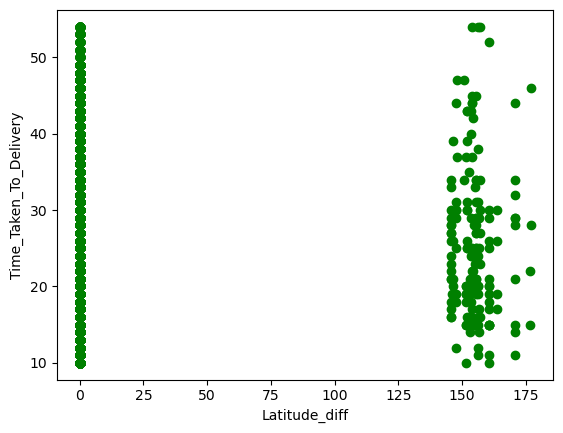

In [317]:
plt.scatter(sorted_data['lon_diff'],sorted_data['Time_taken(min)'],color='green')
plt.xlabel('Latitude_diff')
plt.ylabel('Time_Taken_To_Delivery')
plt.show()

Distplot for delivery_ratings

/tmp/ipykernel_20713/972961078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery_person_Ratings'])
/home/vamsi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Delivery_person_Ratings', ylabel='Density'>

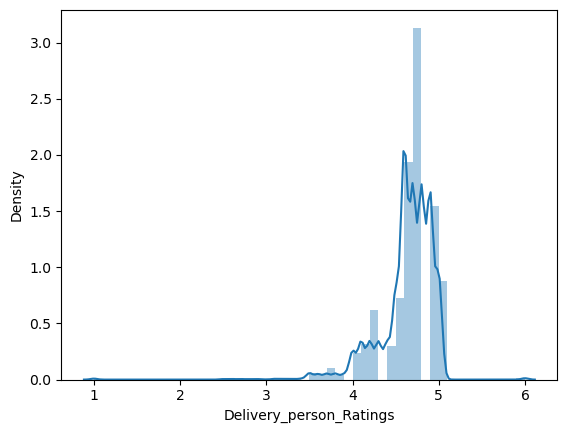

In [318]:

sns.distplot(data['Delivery_person_Ratings'])

Pie Chart of vehicle Types

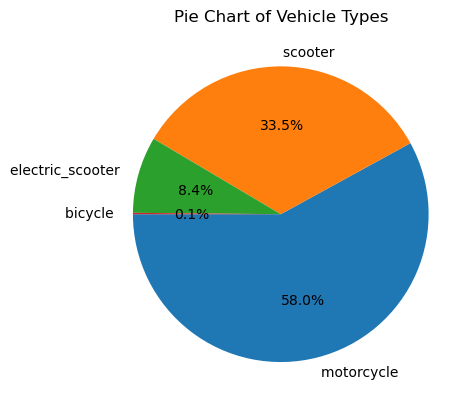

In [319]:
un_vehicle = list(data['Type_of_vehicle'].unique())
un_vehicle_count = list(data['Type_of_vehicle'].value_counts())

plt.pie(un_vehicle_count, labels=un_vehicle, startangle=180, explode=[0, 0, 0, 0], shadow=False, autopct="%2.1f%%")
plt.title("Pie Chart of Vehicle Types")
plt.show()

# Model

Preparing Dummie data for Model

Removing uncorrelated columns from the dataframe using Heat map

In [321]:

data=data.drop(columns=['ID','Age_Bins'])
data=data.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])
data=data.drop(columns=['Delivery_person_ID'])
data=data.drop(columns=['Type_of_vehicle'])
data=data.drop(columns=['lat_diff','lon_diff'])

data

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Time_taken(min),distance,speed
0,37,4.9,Snack,24,3020.736643,125.864027
1,34,4.5,Snack,33,20143.736910,610.416270
2,23,4.4,Drinks,26,1549.692932,59.603574
3,38,4.7,Buffet,21,7774.496620,370.214125
4,32,4.6,Snack,30,6197.897917,206.596597
...,...,...,...,...,...,...
45588,30,4.8,Meal,32,1488.111648,46.503489
45589,21,4.6,Buffet,36,10983.241696,305.090047
45590,30,4.9,Drinks,16,4648.024233,290.501515
45591,20,4.7,Snack,26,6219.667685,239.217988


In [322]:

dummie_data=pd.get_dummies(data,columns=['Type_of_order'])
dummie_data

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),distance,speed,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
0,37,4.9,24,3020.736643,125.864027,False,False,False,True
1,34,4.5,33,20143.736910,610.416270,False,False,False,True
2,23,4.4,26,1549.692932,59.603574,False,True,False,False
3,38,4.7,21,7774.496620,370.214125,True,False,False,False
4,32,4.6,30,6197.897917,206.596597,False,False,False,True
...,...,...,...,...,...,...,...,...,...
45588,30,4.8,32,1488.111648,46.503489,False,False,True,False
45589,21,4.6,36,10983.241696,305.090047,True,False,False,False
45590,30,4.9,16,4648.024233,290.501515,False,True,False,False
45591,20,4.7,26,6219.667685,239.217988,False,False,False,True


In [323]:
dummie_data.corr()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),distance,speed,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack
Delivery_person_Age,1.000000,-0.067449,0.292708,0.014255,0.013891,0.003924,-0.000767,0.004367,-0.007491
Delivery_person_Ratings,-0.067449,1.000000,-0.331103,-0.006214,0.001389,0.001319,-0.000737,-0.003867,0.003282
Time_taken(min),0.292708,-0.331103,1.000000,-0.002507,-0.031524,-0.000678,-0.006533,0.007697,-0.000515
distance,0.014255,-0.006214,-0.002507,1.000000,0.934358,-0.002788,-0.001170,0.006242,-0.002298
speed,0.013891,0.001389,-0.031524,0.934358,1.000000,-0.002480,0.000460,0.007316,-0.005297
Type_of_order_Buffet,0.003924,0.001319,-0.000678,-0.002788,-0.002480,1.000000,-0.329552,-0.332185,-0.333637
Type_of_order_Drinks,-0.000767,-0.000737,-0.006533,-0.001170,0.000460,-0.329552,1.000000,-0.333006,-0.334462
Type_of_order_Meal,0.004367,-0.003867,0.007697,0.006242,0.007316,-0.332185,-0.333006,1.000000,-0.337135
Type_of_order_Snack,-0.007491,0.003282,-0.000515,-0.002298,-0.005297,-0.333637,-0.334462,-0.337135,1.000000


In [324]:
dummie_data.rename(columns={'Time_taken(min)':'Time'},inplace=True)

Export the DataFrame to an Excel file

# XGB Regressor Model

Splitting data into data and Target

In [325]:
X=dummie_data.drop(['Time'],axis=1)
Y=dummie_data['Time']

Dividing dummie data into X_train,X_test,Y_train,Y_test for our model

In [326]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

XGBRegressor Model

In [327]:
model=XGBRegressor()

In [328]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [329]:
model.score(X_test,Y_test)

0.989140710968948

In [330]:
#predicting a value by giving inputs
model.predict([[37,4.9,3020.736643,125.864027,False,False,False,True]])

array([24.109892], dtype=float32)

# Linear Regression

In [331]:
model2 = LinearRegression()


In [332]:
model2.fit(X_train,Y_train)

LinearRegression()

In [333]:
model2.score(X_test,Y_test)

0.1989975626930952

# Metrices

In [334]:
training_prediction=model.predict(X_train)
model.score(X_test,Y_test)

0.989140710968948

In [335]:
score_1=metrics.r2_score(Y_train,training_prediction)
score_2=metrics.mean_absolute_error(Y_train,training_prediction)

In [336]:
print('r^2 value is',score_1)
print('mean absolute error',score_2)

r^2 value is 0.9917616774902189
mean absolute error 0.39995430237095025


Text(0.5, 1.0, 'Actual price vs predicted price')

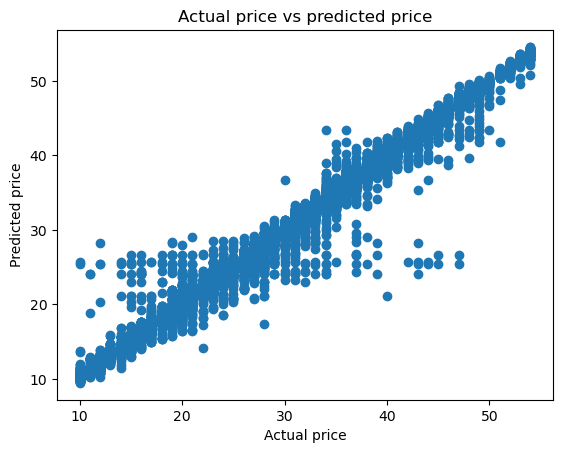

In [337]:
plt.scatter(Y_train,training_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')

In [338]:
test_prediction=model.predict(X_test)

In [339]:
score_11=metrics.r2_score(Y_test,test_prediction)
score_22=metrics.mean_absolute_error(Y_test,test_prediction)

In [340]:
print('r^2 value is',score_11)
print('mean absolute error',score_22)

r^2 value is 0.989140710968948
mean absolute error 0.46195604717774613


Text(0.5, 1.0, 'Actual price vs predicted price')

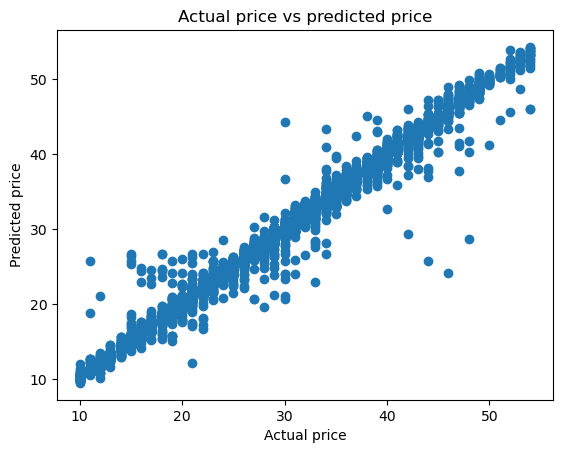

In [341]:
plt.scatter(Y_test,test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')

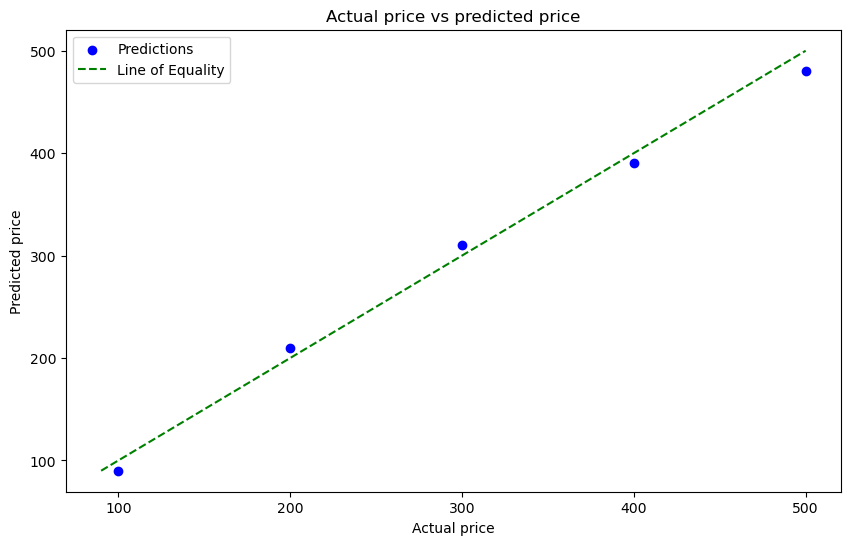

In [344]:

Y_test = np.array([100, 200, 300, 400, 500])  
test_prediction = np.array([90, 210, 310, 390, 480])

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_prediction, color='blue', label='Predictions')

max_value = max(max(Y_test), max(test_prediction))
min_value = min(min(Y_test), min(test_prediction))
plt.plot([min_value, max_value], [min_value, max_value], color='green', linestyle='--', label='Line of Equality')

plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')
plt.legend()
plt.show()


# Conclusion

In conclusion, our project aimed to predict delivery time using machine learning models, specifically the
XGB Regressor and Linear Regression. By using features such as distance, speed, delivery person age,
delivery person ratings, and snack item, we developed a model that successfully predicted delivery time.
This project demonstrates the potential of machine learning in online food delivery
platforms, empowering individuals to make informed decisions about when to order an item. Moreover, by analyzing the factors that influence delivery time,we can gain valuable insights into the delivery process, identify potential areas for improvement, and
implement strategies to reduce delivery times.We selected the model with the highest accuracy, which
is the XGB Regressor. This model’s superior performance, even with large datasets, ensures that our
predictions are reliable and efficient. Through this project, we have showcased the power of machine
learning in addressing real-world problems and improving service delivery in the food industry.